In [5]:
import pandas as pd 
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Nifty Bank Historical Data.csv")
#df = df1.loc[0:591,:]
Monday = []
Tuesday = []
Wednesday = [] 
Thursday = [] 
Friday = [] 
df['Dates'] = df['Date'].astype('datetime64[ns]') 
price = df['Price'].tolist() 
Dates = df.Dates.tolist() 


 #MAKE SURE THE FIRST DATE IS A MONDAY AND THE LAST DAY, FRIDAY, SHOULDN'T BE A MARKET HOLIDAY
 #Market days list
og =[] 
for i in range(len(Dates)): 
    my_date = Dates[i] 
    x = calendar.day_name[my_date.weekday()] 
    og.append(x) 

#General Day list
complete = [] 
New = [] 
d1 = date(2014, 7, 14)       # start date
d2 = date(2019, 7, 12)      # end date
delta = d2 - d1             # timedelta
for i in range(delta.days + 1):
    New.append(d1 + timedelta(days=i))
    var = calendar.day_name[New[i].weekday()]
    complete.append(var)

NameError: name 'date' is not defined

In [ ]:
# removing unique weekends
n = []
for i in range(len(og)):
    if og[i] == 'Saturday' or og[i] == 'Sunday':
        n.append(i)
n.sort(reverse = True)
for i in n:
    del price[i]
n = []
for i in range(len(og)):
    if og[i] == 'Saturday':
        n.append(i)
for i in range(len(n)):
    og.remove('Saturday')
n = []
for i in range(len(og)):
    if og[i] == 'Sunday':
        n.append(i)
for i in range(len(n)):
    og.remove('Sunday')
    
# removing weekends from all days between dates
for i in range(len(complete)):
    if complete[i] == 'Saturday' or complete[i] == 'Sunday':
        n.append(i)
for i in range(int(len(n)/2)):
    complete.remove('Saturday')
    complete.remove('Sunday')
    
    
        

In [ ]:
for i in range(len(complete)):
    if complete[i] != og[i]:
        og.insert(i,complete[i])
        price.insert(i,price[i-1])
list = price
dfdays = pd.DataFrame({
                 'Days' : og,
                  'Price': price})

In [ ]:
for i in range(0,len(price),5):
    Monday.append(price[i])
for i in range(1,len(price),5):
    Tuesday.append(price[i])
for i in range(2,len(price),5):
    Wednesday.append(price[i])
for i in range(3,len(price),5):
    Thursday.append(price[i])
for i in range(4,len(price),5):
    Friday.append(price[i])
final = pd.DataFrame({
                 'Monday' : Monday,
                 'Tuesday': Tuesday,
                 'Wednesday': Wednesday,
                 'Thursday':Thursday,
                 'Friday': Friday})  




In [ ]:
final

In [ ]:
final.columns 

In [ ]:
X = final[['Monday', 'Tuesday', 'Wednesday', 'Thursday']]

In [ ]:
y = final['Friday']

In [ ]:
from sklearn.model_selection import train_test_split

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


NameError: name 'train_test_split' is not defined

In [3]:
from sklearn.linear_model import LinearRegression

In [647]:
lm = LinearRegression()

In [648]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [649]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.03839691 -0.20026176  0.25843307  0.90546721]


In [650]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

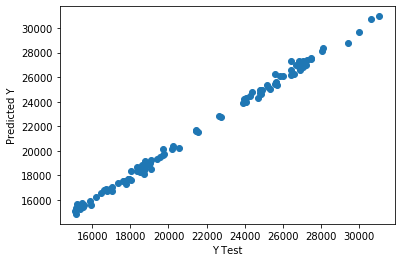

In [651]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [628]:
Prediction = predictions.tolist()

In [629]:
Real = y_test.tolist()

In [632]:
Prediction[0:10]

[16225.137676605062,
 28361.104157046197,
 26295.876973398972,
 16585.47610435715,
 15889.570771943047,
 20411.052096720523,
 15568.457949807165,
 21640.60158749077,
 26953.208215713097,
 14844.839525164774]

In [633]:
Real[0:10]

[16175, 28124, 25597, 16481, 15888, 20245, 15930, 21444, 26693, 15162]

In [634]:
final

,Monday,Tuesday,Wednesday,Thursday,Friday
0,14490,14892,15265,15269,15389
1,15386,15427,15463,15534,15322
2,15212,15212,15452,15268,15128
3,15242,15293,15009,14987,14766
4,14847,15057,14911,15090,15090
5,15440,15525,15482,15662,15819
6,15669,15624,15718,15740,15740
7,16013,16131,16110,16034,15983
8,16207,16157,16152,16204,16254
9,16168,15844,15839,16157,16152
